# **Predicting the species of an unknown iris type flower**

*-BARATAM NIDHISHRI*

# Block 1: Imports and Data Loading

In [ ]:
# Imports
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn .model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
iris=load_iris()
x=iris.data
y=iris.target

# Block 2: Data Preprocessing (One-Hot Encoding and Train-Test Split)

In [ ]:
# One-hot encode the target
encode=LabelBinarizer()
y=encode.fit_transform(y)

# Train-test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Block 3: Data Visualization Before Scaling

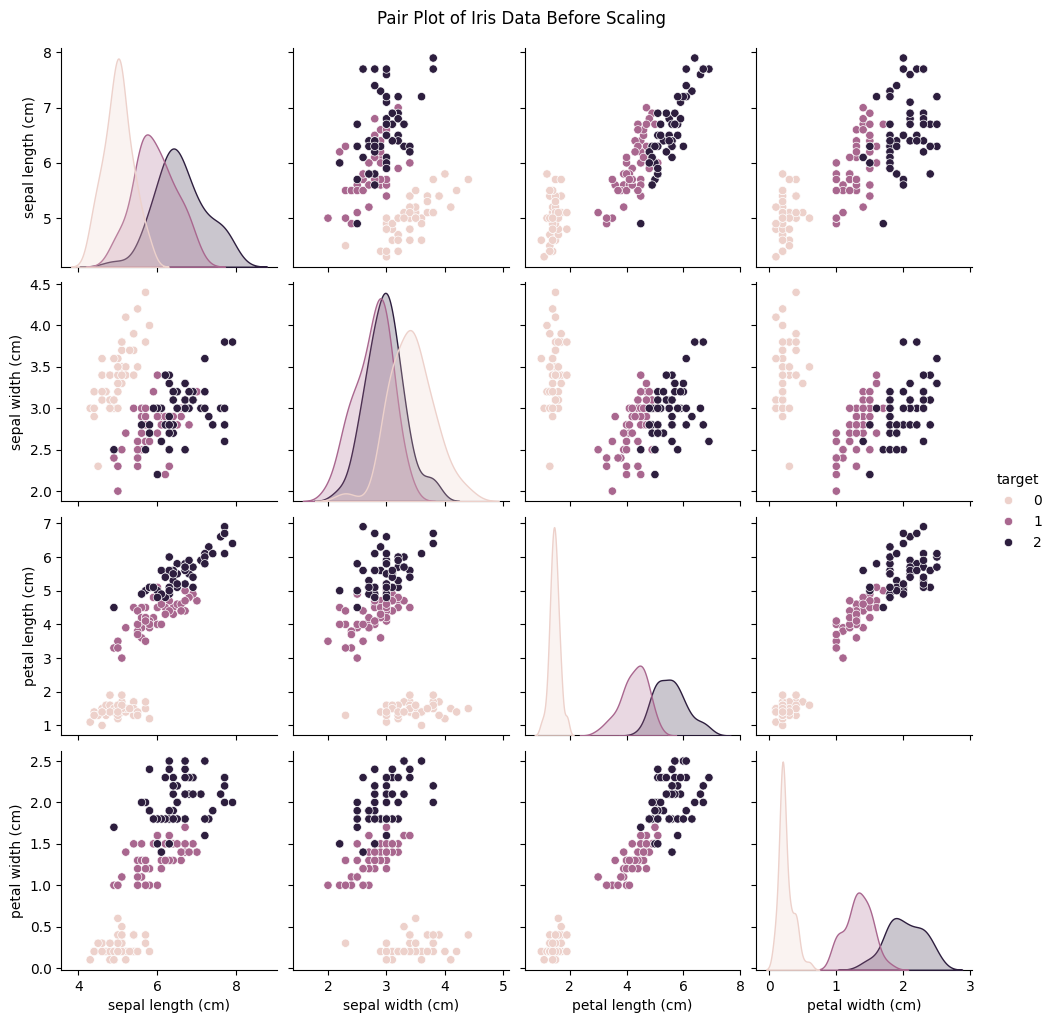

In [ ]:
# Create a DataFrame for the original data before scaling
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Visualize data before scaling
sns.pairplot(iris_df, hue='target', vars=iris.feature_names)
plt.suptitle("Pair Plot of Iris Data Before Scaling", y=1.02)
plt.show()

# Block 4: Feature Scaling

In [ ]:
# Feature scaling
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Block 5: Data Visualization After Scaling

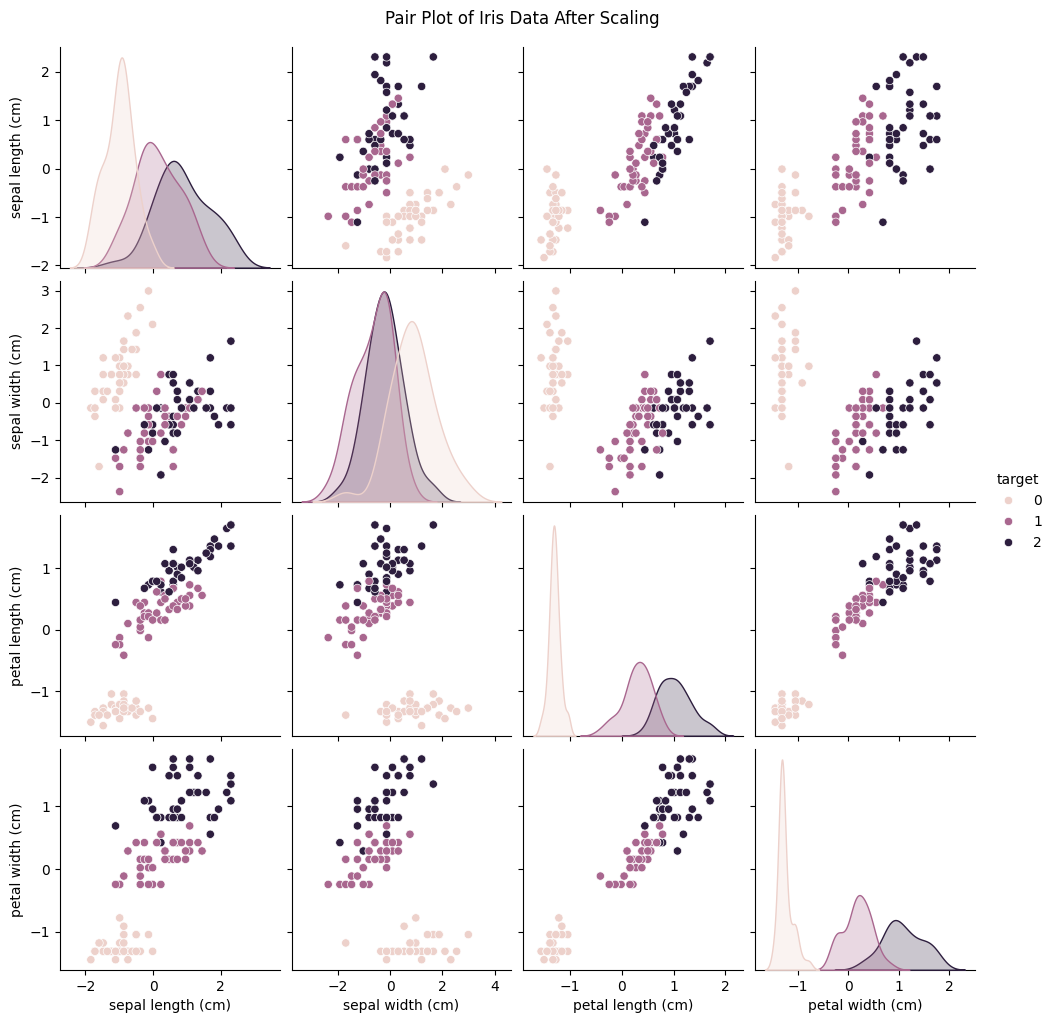

In [ ]:
# Create a DataFrame for scaled data
scaled_x_df = pd.DataFrame(x_train, columns=iris.feature_names)
scaled_x_df['target'] = np.argmax(y_train, axis=1) # Convert one-hot encoded target back to original labels for visualization

# Visualize data after scaling
sns.pairplot(scaled_x_df, hue='target', vars=iris.feature_names)
plt.suptitle("Pair Plot of Iris Data After Scaling", y=1.02)
plt.show()

# Block 6: Building and Compiling the ANN Model

In [ ]:
# Building ANN model
model=Sequential()
model.add(Dense(8,activation='relu',input_shape=(4,)))
model.add(Dense(10,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Block 7: Training the Model

In [ ]:
# Train the model and store history
print("\nTRAINING THE MODEL:\n")
history = model.fit(x_train,y_train,epochs=75,verbose=1,validation_data=(x_test,y_test))


TRAINING THE MODEL:

Epoch 1/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.4150 - loss: 1.0636 - val_accuracy: 0.5333 - val_loss: 0.9918
Epoch 2/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4571 - loss: 1.0443 - val_accuracy: 0.5000 - val_loss: 0.9744
Epoch 3/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4592 - loss: 1.0044 - val_accuracy: 0.5000 - val_loss: 0.9576
Epoch 4/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4602 - loss: 1.0073 - val_accuracy: 0.5000 - val_loss: 0.9418
Epoch 5/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.4815 - loss: 0.9691 - val_accuracy: 0.5000 - val_loss: 0.9265
Epoch 6/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5008 - loss: 0.9514 - val_accuracy: 0.5667 - val_loss: 0.9111
Epoch 7/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5219 - loss: 0.9690 - val_accuracy: 0.7000 - val_loss: 0.8957
Epoch 8/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5519 - loss: 0.9389 - val_accuracy: 0.73

# Block 8: Plotting Training History

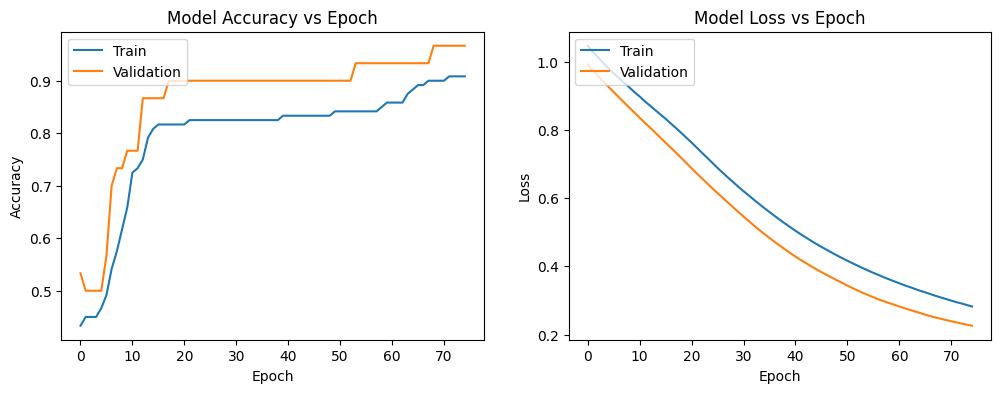

In [ ]:
# Plot accuracy and loss vs epoch
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Block 9: Model Evaluation

In [ ]:
# Evaluate the model
print("\nEVALUATION OF THE MODEL:\n")
loss,accuracy=model.evaluate(x_test,y_test)
print(f"TEST ACCURACY={accuracy:.2f}")
print(f"TEST LOSS={loss:.2f}")


EVALUATION OF THE MODEL:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.9333 - loss: 0.2221
TEST ACCURACY=0.93
TEST LOSS=0.22


# Block 10: Making Predictions on New Data

In [ ]:
print("Head of original data:")
print(iris_df.head())
# Get user input
new_data = []
# Loop through the feature names and use them in the input prompt
for i, feature_name in enumerate(iris.feature_names):
    value = float(input(f"Enter value for {feature_name}: "))
    new_data.append(value)

new_data = np.array([new_data])

# Scale the input
scaled_data = scaler.transform(new_data)

# Make the prediction
prediction = model.predict(scaled_data)

# Get the predicted class index
predicted_class_index = np.argmax(prediction[0])

# Get the species name using the target names from the iris dataset
predicted_species = iris.target_names[predicted_class_index]

print("Predicted Species:", predicted_species)

Head of original data:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Enter value for sepal length (cm): 5
Enter value for sepal width (cm): 2
Enter value for petal length (cm): 1.3
Enter value for petal width (cm): 0.5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Species: versicolor
